# Домашнее задание 1. Первичный анализ данных.

## 1 часть (основная) (20 баллов)

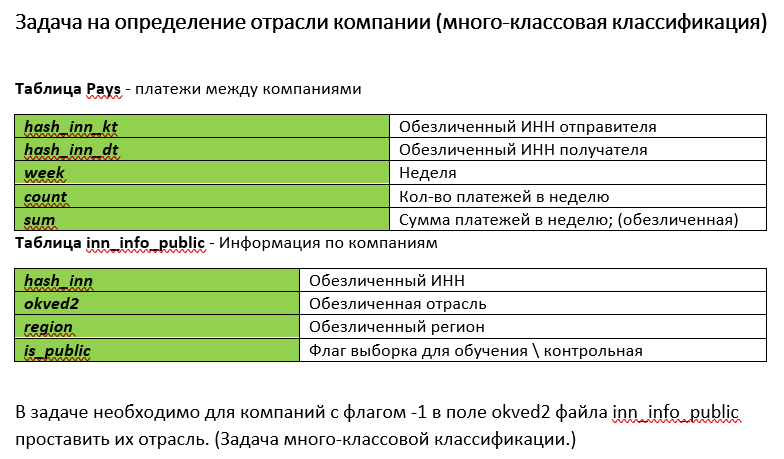

### Задание 0 (0 баллов)

Загрузите данные, проверьте на пропуски.

In [299]:
import pandas as pd
import numpy as np

inns_df = pd.read_csv('/home/anton/ml course/03.03.2023/Pandas_HW/data/inn_info_public.csv')
pays_df = pd.read_csv('/home/anton/ml course/03.03.2023/Pandas_HW/data/pays.csv')

In [300]:
pays_df = pays_df.fillna(0)
pays_df.isna().sum()

hash_inn_kt    0
hash_inn_dt    0
week           0
count          0
sum            0
dtype: int64

In [301]:
inns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240069 entries, 0 to 240068
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   hash_inn   240069 non-null  int64
 1   okved2     240069 non-null  int64
 2   region     240069 non-null  int64
 3   is_public  240069 non-null  bool 
dtypes: bool(1), int64(3)
memory usage: 5.7 MB


In [302]:
inns_df.head(5)

,hash_inn,okved2,region,is_public
0,61058,34,86,True
1,8311,18,86,True
2,130273,-1,86,False
3,64081,43,86,True
4,218005,12,86,True


In [303]:
inns_df.tail(5)

,hash_inn,okved2,region,is_public
240064,139170,4,12,True
240065,13553,12,12,True
240066,230402,12,12,True
240067,170104,63,12,True
240068,162752,-1,12,False


### Задание 1 (2 балла)

По данным таблицы inn_info_public найти количество объектов для каждой отрасли (где она известна). Постройте countplot. Проинтерпретируете полученные результаты, что можно сказать про распределение?   

In [304]:
inns_df = inns_df.rename(columns={'okved2':'area'})

In [305]:
inns_df

,hash_inn,area,region,is_public
0,61058,34,86,True
1,8311,18,86,True
2,130273,-1,86,False
3,64081,43,86,True
4,218005,12,86,True
...,...,...,...,...
240064,139170,4,12,True
240065,13553,12,12,True
240066,230402,12,12,True
240067,170104,63,12,True


In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

([], [])

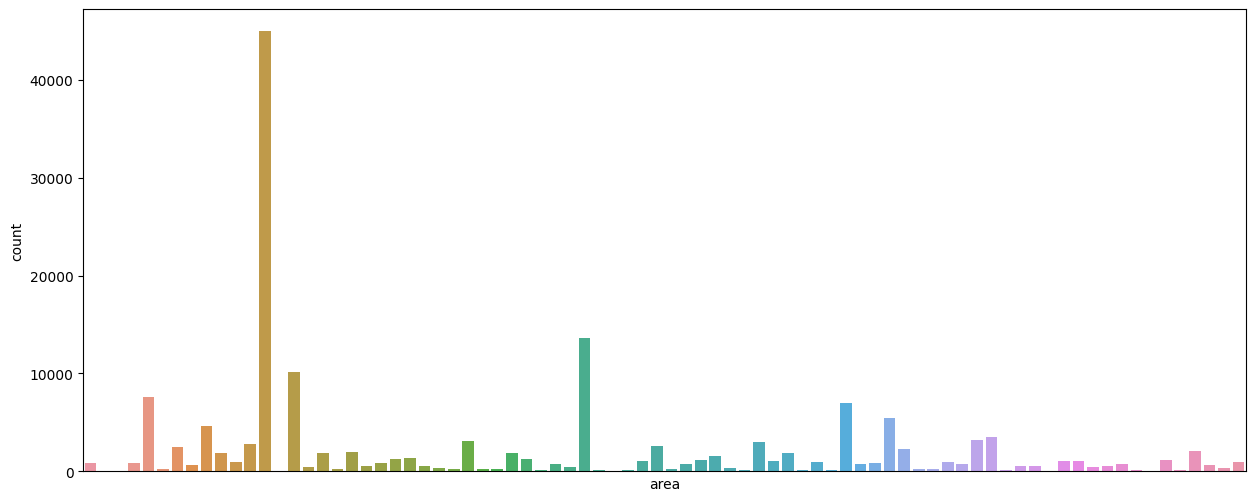

In [307]:
plt.figure(figsize=(15,6))
sns.countplot(data=inns_df[inns_df['area']!=-1],x='area')
plt.xticks([])

([], [])

<Figure size 3000x1500 with 0 Axes>

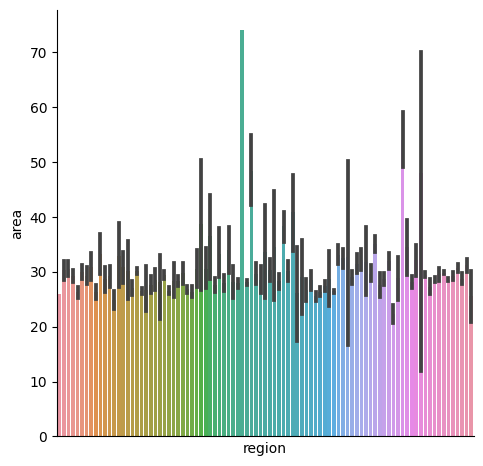

In [308]:
plt.figure(figsize=(30,15))
sns.catplot(y="area",x="region",  kind="bar", data=inns_df[inns_df['area']!=-1])
plt.xticks([])

На привиденных графиках видны несбалансированность классов.

### Задание 2 (3 балла)

По данным таблиц pays и inn_info_public для каждого получателя и каждого отправителя найдите среднее количество платежей в неделю и средний платеж. Для получателей и отправителей постройте гистограммы распределений среднего количества платежей в неделю и среднего платежа отдельно для тренеровочных данных (is_public=0) и отдельно для тестовых данных (is_public=1). Проинтерпретируюте графики, что можно сказать про распределения? Сравните соответствующие гистограммы для тестовых и тренеровочных данных, сделаете выводы о репрезентативности разбиения.

In [309]:
pays_df

,hash_inn_kt,hash_inn_dt,week,count,sum
0,0,0,1,4,38399.6
1,0,0,5,2,399.6
2,0,0,7,2,79.6
3,0,0,9,2,239.6
4,0,0,12,2,79.6
...,...,...,...,...,...
5430145,260511,77935,5,2,399.6
5430146,260511,77935,12,2,439.6
5430147,260511,77935,14,2,7.6
5430148,260511,77935,15,2,79.6


Для отправителя

In [310]:
%%time
# средний платеж за неделю
max_week = pays_df['week'].max() + 1
avg_counts = lambda x : x / (max_week)
avg_counts.__name__ = 'avg_count_per_week'
sender_df = pays_df.groupby(['hash_inn_kt'])['count','sum'].sum()
sender_df['sender_avg_count_per_week'] = sender_df['count'].agg(avg_counts)
#средний сумма платежа
sender_df['sender_avg_payment'] = sender_df['sum'] / sender_df['count']


CPU times: user 131 ms, sys: 28.4 ms, total: 159 ms
Wall time: 158 ms


<timed exec>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [311]:
sender_df

,count,sum,sender_avg_count_per_week,sender_avg_payment
hash_inn_kt,,,,
0,194,253520.588,8.083333,1306.807155
1,14,138.000,0.583333,9.857143
2,5,36.240,0.208333,7.248000
3,1,13.948,0.041667,13.948000
4,18,10.160,0.750000,0.564444
...,...,...,...,...
260504,96,8691.520,4.000000,90.536667
260507,9,139.016,0.375000,15.446222
260509,584,26427.964,24.333333,45.253363


Для получателя

In [312]:
%%time
# средний платеж за неделю
avg_counts = lambda x : x / (max_week)
receive_df = pays_df.groupby(['hash_inn_dt'])['count','sum'].sum()
receive_df['receive_avg_count_per_week'] = receive_df['count'].agg(avg_counts)
#средняя сумма платежа
receive_df['receive_avg_payment'] = receive_df['sum'] / receive_df['count']

<timed exec>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


CPU times: user 251 ms, sys: 10.6 ms, total: 261 ms
Wall time: 259 ms


In [313]:
receive_df

,count,sum,receive_avg_count_per_week,receive_avg_payment
hash_inn_dt,,,,
0,1077,172026.108,44.875000,159.727120
2,29,427.484,1.208333,14.740828
5,38,122.668,1.583333,3.228105
7,17,7809.116,0.708333,459.359765
10,72,152.616,3.000000,2.119667
...,...,...,...,...
260511,17,241.916,0.708333,14.230353
260512,26,134.312,1.083333,5.165846
260513,2,32.896,0.083333,16.448000


In [314]:
inns_df = pd.merge(left = inns_df,right=sender_df[['sender_avg_count_per_week','sender_avg_payment']],how='left',left_index=True,right_index=True)
inns_df = pd.merge(left = inns_df,right=receive_df[['receive_avg_count_per_week','receive_avg_payment']],how='left',left_index=True,right_index=True)

In [315]:
inns_df

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120
1,8311,18,86,True,0.583333,9.857143,NaN,NaN
2,130273,-1,86,False,0.208333,7.248000,1.208333,14.740828
3,64081,43,86,True,0.041667,13.948000,NaN,NaN
4,218005,12,86,True,0.750000,0.564444,NaN,NaN
...,...,...,...,...,...,...,...,...
240064,139170,4,12,True,0.083333,57.800000,NaN,NaN
240065,13553,12,12,True,NaN,NaN,1.333333,2.731375
240066,230402,12,12,True,NaN,NaN,0.166667,-0.188000
240067,170104,63,12,True,NaN,NaN,0.500000,32.386000


Данные репразитивны относительно друг друга, то есть гистрограмма закрывается.

(array([0.14730277, 0.23010562, 0.25140578, 0.19082222, 0.22351177,
        0.19210103, 0.1602507 , 0.13735204, 0.10785951, 0.07381123,
        0.05091257, 0.03109103, 0.01742377, 0.01059013, 0.00627415,
        0.00247769, 0.00195818, 0.00071933, 0.0003197 , 0.00035966]),
 array([-3.17805383, -2.63358395, -2.08911407, -1.54464419, -1.00017431,
        -0.45570442,  0.08876546,  0.63323534,  1.17770522,  1.7221751 ,
         2.26664498,  2.81111486,  3.35558475,  3.90005463,  4.44452451,
         4.98899439,  5.53346427,  6.07793415,  6.62240403,  7.16687391,
         7.7113438 ]),
 <BarContainer object of 20 artists>)

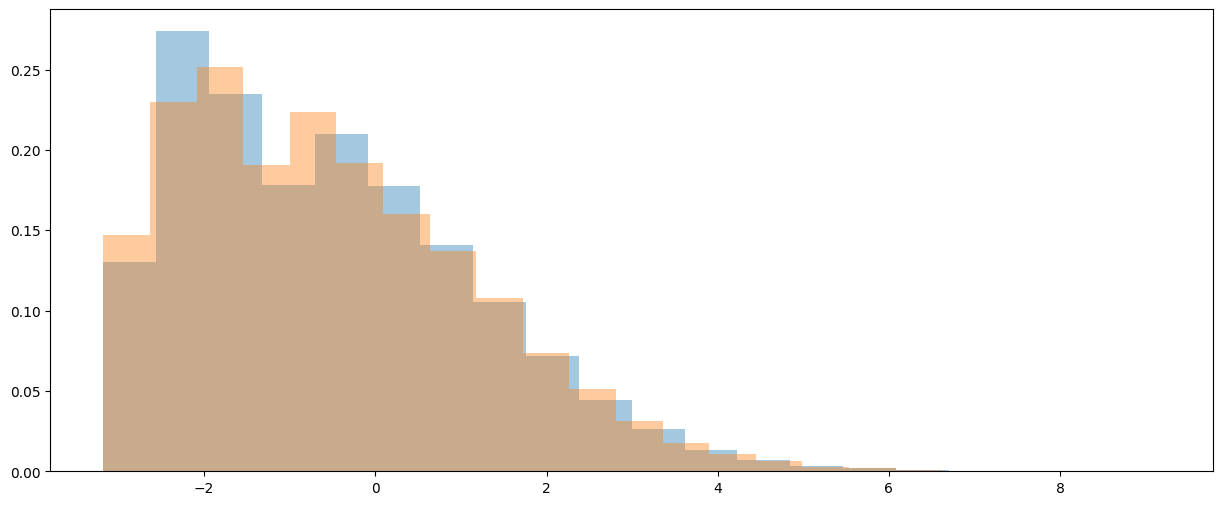

In [316]:
plt.figure(figsize=(15,6))
plt.hist(np.log(inns_df[(inns_df['is_public']==True) & (inns_df['sender_avg_count_per_week']>0)]['sender_avg_count_per_week']),bins=20,density=True,alpha=0.4)
plt.hist(np.log(inns_df[(inns_df['is_public']==False) & (inns_df['sender_avg_count_per_week']>0)]['sender_avg_count_per_week']),bins=20,density=True,alpha=0.4)

(array([1.69068163e-01, 2.42454142e-01, 2.31237646e-01, 1.81378952e-01,
        2.07847147e-01, 1.91090796e-01, 1.65580107e-01, 1.52824762e-01,
        1.29468460e-01, 9.70842467e-02, 7.01031017e-02, 4.99270871e-02,
        3.16318874e-02, 1.75428737e-02, 9.60925443e-03, 4.34297264e-03,
        2.18858464e-03, 7.52325970e-04, 4.10359620e-04, 1.36786540e-04]),
 array([-3.17805383, -2.66646105, -2.15486827, -1.64327549, -1.13168271,
        -0.62008993, -0.10849715,  0.40309563,  0.91468841,  1.42628119,
         1.93787397,  2.44946676,  2.96105954,  3.47265232,  3.9842451 ,
         4.49583788,  5.00743066,  5.51902344,  6.03061622,  6.542209  ,
         7.05380178]),
 <BarContainer object of 20 artists>)

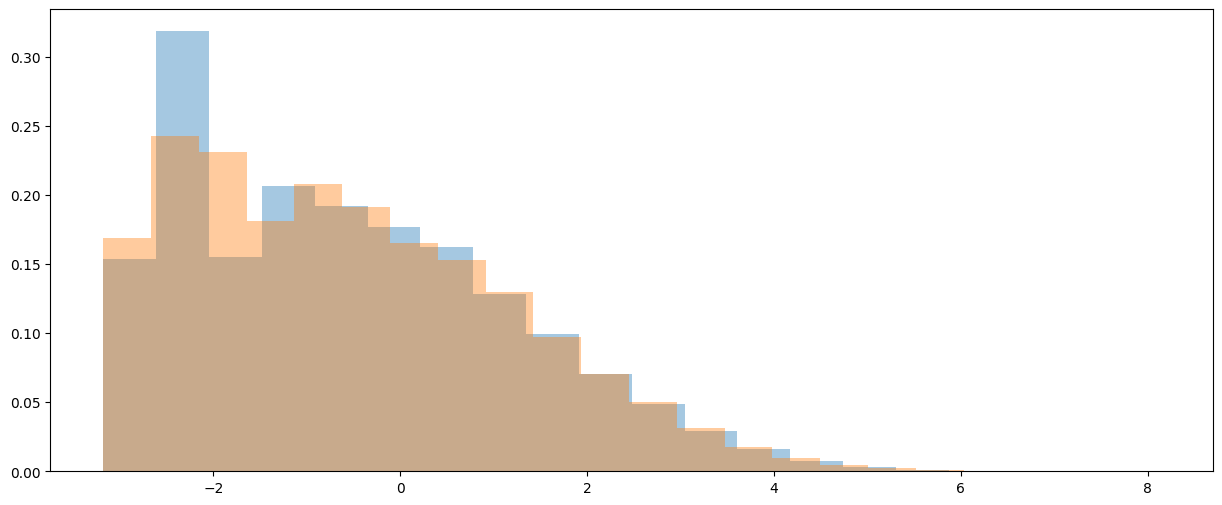

In [317]:
plt.figure(figsize=(15,6))
plt.hist(np.log(inns_df[(inns_df['is_public']==True) & (inns_df['receive_avg_count_per_week']>0)]['receive_avg_count_per_week']),bins=20,density=True,alpha=0.4)
plt.hist(np.log(inns_df[(inns_df['is_public']==False) & (inns_df['receive_avg_count_per_week']>0)]['receive_avg_count_per_week']),bins=20,density=True,alpha=0.4)

Видим, что распределение похоже друг на друга.

In [318]:
train_inns_df = inns_df[inns_df['is_public']==True]
test_inns_df = inns_df[inns_df['is_public']==False]

In [319]:
train_inns_df

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120
1,8311,18,86,True,0.583333,9.857143,NaN,NaN
3,64081,43,86,True,0.041667,13.948000,NaN,NaN
4,218005,12,86,True,0.750000,0.564444,NaN,NaN
5,159729,34,86,True,1.916667,6.454783,1.583333,3.228105
...,...,...,...,...,...,...,...,...
240063,46487,52,12,True,0.333333,7.830000,NaN,NaN
240064,139170,4,12,True,0.083333,57.800000,NaN,NaN
240065,13553,12,12,True,NaN,NaN,1.333333,2.731375
240066,230402,12,12,True,NaN,NaN,0.166667,-0.188000


In [320]:
test_inns_df

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment
2,130273,-1,86,False,0.208333,7.248000,1.208333,14.740828
7,205011,-1,86,False,5.833333,239.582629,0.708333,459.359765
13,27440,-1,86,False,NaN,NaN,0.333333,133.535500
15,34209,-1,86,False,NaN,NaN,0.041667,2.640000
20,260191,-1,37,False,0.666667,5.375000,0.083333,2.612000
...,...,...,...,...,...,...,...,...
240056,217719,-1,69,False,13.250000,38.015874,9.750000,19.393077
240058,156954,-1,49,False,NaN,NaN,0.791667,173.849053
240059,249271,-1,49,False,6.500000,27.066154,0.333333,270.196000
240062,196702,-1,12,False,48.291667,57.302637,67.000000,61.359706


### Задание 3 (1 балл)

Создайте копию таблицы inn_info_public и присоедините к ней таблицу, полученную в задании 2 по полю hash_inn. Обработайте пропуски.

In [321]:
inn_info_public_copy = inns_df.fillna(0)

In [322]:
inn_info_public_copy

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120
1,8311,18,86,True,0.583333,9.857143,0.000000,0.000000
2,130273,-1,86,False,0.208333,7.248000,1.208333,14.740828
3,64081,43,86,True,0.041667,13.948000,0.000000,0.000000
4,218005,12,86,True,0.750000,0.564444,0.000000,0.000000
...,...,...,...,...,...,...,...,...
240064,139170,4,12,True,0.083333,57.800000,0.000000,0.000000
240065,13553,12,12,True,0.000000,0.000000,1.333333,2.731375
240066,230402,12,12,True,0.000000,0.000000,0.166667,-0.188000
240067,170104,63,12,True,0.000000,0.000000,0.500000,32.386000


In [323]:
inn_info_public_copy.value_counts()

hash_inn  area  region  is_public  sender_avg_count_per_week  sender_avg_payment  receive_avg_count_per_week  receive_avg_payment
0         -1    84      False      0.583333                   11.885714           0.000000                    0.000000               1
173629     8    56      True       0.958333                   78.492870           0.708333                    64.373647              1
173616     29   72      True       0.083333                   0.038000            23.375000                   103.369554             1
173617    -1    85      False      1.625000                   2.675385            2.458333                    2.778237               1
173618     61   18      True       0.000000                   0.000000            0.916667                    121.427636             1
                                                                                                                                    ..
86832      12   84      True       0.000000                 

### Задание 4 (2 балла)

Для каждой организации в таблице pays найдите количество организаций от которых поступили платежи, и количество организаций в адрес которых были осуществлены платежи. Результат присоедините к таблице полученной в задании 3 по полю hash_inn. Обработайте пропуски.

In [324]:
pays_df_new = pays_df

In [325]:
sender_pays_df = pays_df_new['hash_inn_kt'].value_counts()
receive_pays_df = pays_df_new['hash_inn_dt'].value_counts()

In [326]:
pays_df_new['sender_count'] = sender_pays_df
pays_df_new['receive_count'] = receive_pays_df

In [327]:
pays_df_new

,hash_inn_kt,hash_inn_dt,week,count,sum,sender_count,receive_count
0,0,0,1,4,38399.6,85.0,447.0
1,0,0,5,2,399.6,7.0,NaN
2,0,0,7,2,79.6,3.0,10.0
3,0,0,9,2,239.6,1.0,NaN
4,0,0,12,2,79.6,17.0,NaN
...,...,...,...,...,...,...,...
5430145,260511,77935,5,2,399.6,NaN,NaN
5430146,260511,77935,12,2,439.6,NaN,NaN
5430147,260511,77935,14,2,7.6,NaN,NaN
5430148,260511,77935,15,2,79.6,NaN,NaN


In [328]:
inns_df_copy = pd.merge(left = inn_info_public_copy,right=pays_df_new[['sender_count','receive_count']],how='left',left_index=True,right_index=True)


In [329]:
inns_df_copy = inns_df_copy.fillna(0)

In [330]:
inns_df_copy

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment,sender_count,receive_count
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,85.0,447.0
1,8311,18,86,True,0.583333,9.857143,0.000000,0.000000,7.0,0.0
2,130273,-1,86,False,0.208333,7.248000,1.208333,14.740828,3.0,10.0
3,64081,43,86,True,0.041667,13.948000,0.000000,0.000000,1.0,0.0
4,218005,12,86,True,0.750000,0.564444,0.000000,0.000000,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...
240064,139170,4,12,True,0.083333,57.800000,0.000000,0.000000,1.0,0.0
240065,13553,12,12,True,0.000000,0.000000,1.333333,2.731375,0.0,15.0
240066,230402,12,12,True,0.000000,0.000000,0.166667,-0.188000,0.0,4.0
240067,170104,63,12,True,0.000000,0.000000,0.500000,32.386000,0.0,6.0


### Задание 5 (2 балла)

Для каждой организации в таблице pays найдите количество отраслей от которых поступили платежи, и количество отраслей в адрес которых были осуществлены платежи. Результат присоедините к таблице полученной в задании 4 по полю hash_inn. Обработайте пропуски.

In [331]:
pays_df

,hash_inn_kt,hash_inn_dt,week,count,sum,sender_count,receive_count
0,0,0,1,4,38399.6,85.0,447.0
1,0,0,5,2,399.6,7.0,NaN
2,0,0,7,2,79.6,3.0,10.0
3,0,0,9,2,239.6,1.0,NaN
4,0,0,12,2,79.6,17.0,NaN
...,...,...,...,...,...,...,...
5430145,260511,77935,5,2,399.6,NaN,NaN
5430146,260511,77935,12,2,439.6,NaN,NaN
5430147,260511,77935,14,2,7.6,NaN,NaN
5430148,260511,77935,15,2,79.6,NaN,NaN


In [332]:
inns_df

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120
1,8311,18,86,True,0.583333,9.857143,NaN,NaN
2,130273,-1,86,False,0.208333,7.248000,1.208333,14.740828
3,64081,43,86,True,0.041667,13.948000,NaN,NaN
4,218005,12,86,True,0.750000,0.564444,NaN,NaN
...,...,...,...,...,...,...,...,...
240064,139170,4,12,True,0.083333,57.800000,NaN,NaN
240065,13553,12,12,True,NaN,NaN,1.333333,2.731375
240066,230402,12,12,True,NaN,NaN,0.166667,-0.188000
240067,170104,63,12,True,NaN,NaN,0.500000,32.386000


In [333]:
inns_df_copy2 = pd.merge(left = inns_df,right=pays_df[['hash_inn_kt','hash_inn_dt']],how='left',left_index=True,right_index=True)

In [334]:
inns_df_copy2

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment,hash_inn_kt,hash_inn_dt
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,0,0
1,8311,18,86,True,0.583333,9.857143,NaN,NaN,0,0
2,130273,-1,86,False,0.208333,7.248000,1.208333,14.740828,0,0
3,64081,43,86,True,0.041667,13.948000,NaN,NaN,0,0
4,218005,12,86,True,0.750000,0.564444,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...
240064,139170,4,12,True,0.083333,57.800000,NaN,NaN,12595,174005
240065,13553,12,12,True,NaN,NaN,1.333333,2.731375,12595,174005
240066,230402,12,12,True,NaN,NaN,0.166667,-0.188000,12595,174005
240067,170104,63,12,True,NaN,NaN,0.500000,32.386000,12595,174005


In [335]:
sender_area = inns_df_copy2.groupby(['hash_inn_kt'])['area'].count()
receive_area = inns_df_copy2.groupby(['hash_inn_dt'])['area'].count()



In [336]:
inns_df_copy2['count_sender_area'] = sender_area
inns_df_copy2['count_receive_area'] = receive_area


In [337]:
inns_df_copy2

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment,hash_inn_kt,hash_inn_dt,count_sender_area,count_receive_area
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,0,0,85.0,22.0
1,8311,18,86,True,0.583333,9.857143,NaN,NaN,0,0,7.0,NaN
2,130273,-1,86,False,0.208333,7.248000,1.208333,14.740828,0,0,3.0,NaN
3,64081,43,86,True,0.041667,13.948000,NaN,NaN,0,0,1.0,NaN
4,218005,12,86,True,0.750000,0.564444,NaN,NaN,0,0,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
240064,139170,4,12,True,0.083333,57.800000,NaN,NaN,12595,174005,NaN,NaN
240065,13553,12,12,True,NaN,NaN,1.333333,2.731375,12595,174005,NaN,NaN
240066,230402,12,12,True,NaN,NaN,0.166667,-0.188000,12595,174005,NaN,NaN
240067,170104,63,12,True,NaN,NaN,0.500000,32.386000,12595,174005,NaN,NaN


In [338]:
inns_df_copy3 = pd.merge(left = inns_df_copy,right=inns_df_copy2[['count_sender_area','count_receive_area']],how='left',left_index=True,right_index=True)


In [339]:
inns_df_copy3

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment,sender_count,receive_count,count_sender_area,count_receive_area
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,85.0,447.0,85.0,22.0
1,8311,18,86,True,0.583333,9.857143,0.000000,0.000000,7.0,0.0,7.0,NaN
2,130273,-1,86,False,0.208333,7.248000,1.208333,14.740828,3.0,10.0,3.0,NaN
3,64081,43,86,True,0.041667,13.948000,0.000000,0.000000,1.0,0.0,1.0,NaN
4,218005,12,86,True,0.750000,0.564444,0.000000,0.000000,17.0,0.0,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
240064,139170,4,12,True,0.083333,57.800000,0.000000,0.000000,1.0,0.0,NaN,NaN
240065,13553,12,12,True,0.000000,0.000000,1.333333,2.731375,0.0,15.0,NaN,NaN
240066,230402,12,12,True,0.000000,0.000000,0.166667,-0.188000,0.0,4.0,NaN,NaN
240067,170104,63,12,True,0.000000,0.000000,0.500000,32.386000,0.0,6.0,NaN,NaN


In [340]:
inns_df_copy3 = inns_df_copy3.fillna(0)

In [341]:
inns_df_copy3

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment,sender_count,receive_count,count_sender_area,count_receive_area
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,85.0,447.0,85.0,22.0
1,8311,18,86,True,0.583333,9.857143,0.000000,0.000000,7.0,0.0,7.0,0.0
2,130273,-1,86,False,0.208333,7.248000,1.208333,14.740828,3.0,10.0,3.0,0.0
3,64081,43,86,True,0.041667,13.948000,0.000000,0.000000,1.0,0.0,1.0,0.0
4,218005,12,86,True,0.750000,0.564444,0.000000,0.000000,17.0,0.0,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
240064,139170,4,12,True,0.083333,57.800000,0.000000,0.000000,1.0,0.0,0.0,0.0
240065,13553,12,12,True,0.000000,0.000000,1.333333,2.731375,0.0,15.0,0.0,0.0
240066,230402,12,12,True,0.000000,0.000000,0.166667,-0.188000,0.0,4.0,0.0,0.0
240067,170104,63,12,True,0.000000,0.000000,0.500000,32.386000,0.0,6.0,0.0,0.0


### Задание 6 (3 балла)

Для каждой отрасли (где она известна) найдите среднее и стандартное отклонение среднего количества входящих и исходящих платежей в неделю по всем организациям в этой отрасли, а также среднее и стандартное отклонение среднего входящего и исходящего платежа в формате таблицы. К данной таблице присоедините таблицу, полученную в задании 1 по полю okved2. Для 5 произвольных отраслей постройте boxplot для среднего количества входящих и исходящих платежей в неделю, а также для среднего входящего и исходящего платежа. Проинтерпретируете полученные результаты. На сколько хорошо данные признаки позволяют разделить отрасли между собой?

In [403]:
inns_df_copy2

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment,hash_inn_kt,hash_inn_dt,count_sender_area,count_receive_area
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,0,0,85.0,22.0
1,8311,18,86,True,0.583333,9.857143,NaN,NaN,0,0,7.0,NaN
2,130273,-1,86,False,0.208333,7.248000,1.208333,14.740828,0,0,3.0,NaN
3,64081,43,86,True,0.041667,13.948000,NaN,NaN,0,0,1.0,NaN
4,218005,12,86,True,0.750000,0.564444,NaN,NaN,0,0,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
240064,139170,4,12,True,0.083333,57.800000,NaN,NaN,12595,174005,NaN,NaN
240065,13553,12,12,True,NaN,NaN,1.333333,2.731375,12595,174005,NaN,NaN
240066,230402,12,12,True,NaN,NaN,0.166667,-0.188000,12595,174005,NaN,NaN
240067,170104,63,12,True,NaN,NaN,0.500000,32.386000,12595,174005,NaN,NaN


In [404]:
inns_df_copy4 = inns_df_copy2[inns_df_copy2['area']!=-1]

In [405]:
inns_df_copy4['sender_mean'] =  inns_df_copy4.groupby(['hash_inn_kt'])['sender_avg_count_per_week'].agg(['mean'])
inns_df_copy4['sender_std'] = inns_df_copy4.groupby(['hash_inn_kt'])['sender_avg_count_per_week'].agg(['std'])

inns_df_copy4['receive_mean'] =  inns_df_copy4.groupby(['hash_inn_dt'])['receive_avg_count_per_week'].agg(['mean'])
inns_df_copy4['receive_std'] = inns_df_copy4.groupby(['hash_inn_dt'])['receive_avg_count_per_week'].agg(['std'])

/tmp/ipykernel_1044467/3756044161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inns_df_copy4['sender_mean'] =  inns_df_copy4.groupby(['hash_inn_kt'])['sender_avg_count_per_week'].agg(['mean'])
/tmp/ipykernel_1044467/3756044161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inns_df_copy4['sender_std'] = inns_df_copy4.groupby(['hash_inn_kt'])['sender_avg_count_per_week'].agg(['std'])
/tmp/ipykernel_1044467/3756044161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [406]:
inns_df_copy4 = inns_df_copy4.fillna(0)

In [407]:
options = [2,34,44,63,12] 

inns_df_copy_area = inns_df_copy4.loc[(inns_df_copy4['area'].isin(options))]

In [408]:
inns_df_copy_area

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment,hash_inn_kt,hash_inn_dt,count_sender_area,count_receive_area,sender_mean,sender_std,receive_mean,receive_std
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,0,0,85.0,22.0,2.036325,4.516642,6.026042,15.707061
4,218005,12,86,True,0.750000,0.564444,0.000000,0.000000,0,0,17.0,0.0,0.541667,0.454911,0.000000,0.000000
5,159729,34,86,True,1.916667,6.454783,1.583333,3.228105,0,0,22.0,2.0,3.594697,7.811852,1.416667,0.000000
11,132582,12,86,True,0.000000,0.000000,0.375000,56.866667,0,7212,0.0,0.0,0.000000,0.000000,0.000000,0.000000
18,173138,12,33,True,0.291667,136.809714,0.041667,136.752000,0,25395,6.0,0.0,0.847222,1.219299,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240046,202972,12,18,True,2.458333,25.814034,0.125000,2.586667,12595,170268,0.0,0.0,0.000000,0.000000,0.000000,0.000000
240051,169816,12,69,True,0.000000,0.000000,0.208333,10.800000,12595,172739,0.0,0.0,0.000000,0.000000,0.000000,0.000000
240065,13553,12,12,True,0.000000,0.000000,1.333333,2.731375,12595,174005,0.0,0.0,0.000000,0.000000,0.000000,0.000000
240066,230402,12,12,True,0.000000,0.000000,0.166667,-0.188000,12595,174005,0.0,0.0,0.000000,0.000000,0.000000,0.000000


<Axes: xlabel='area', ylabel='sender_avg_count_per_week'>

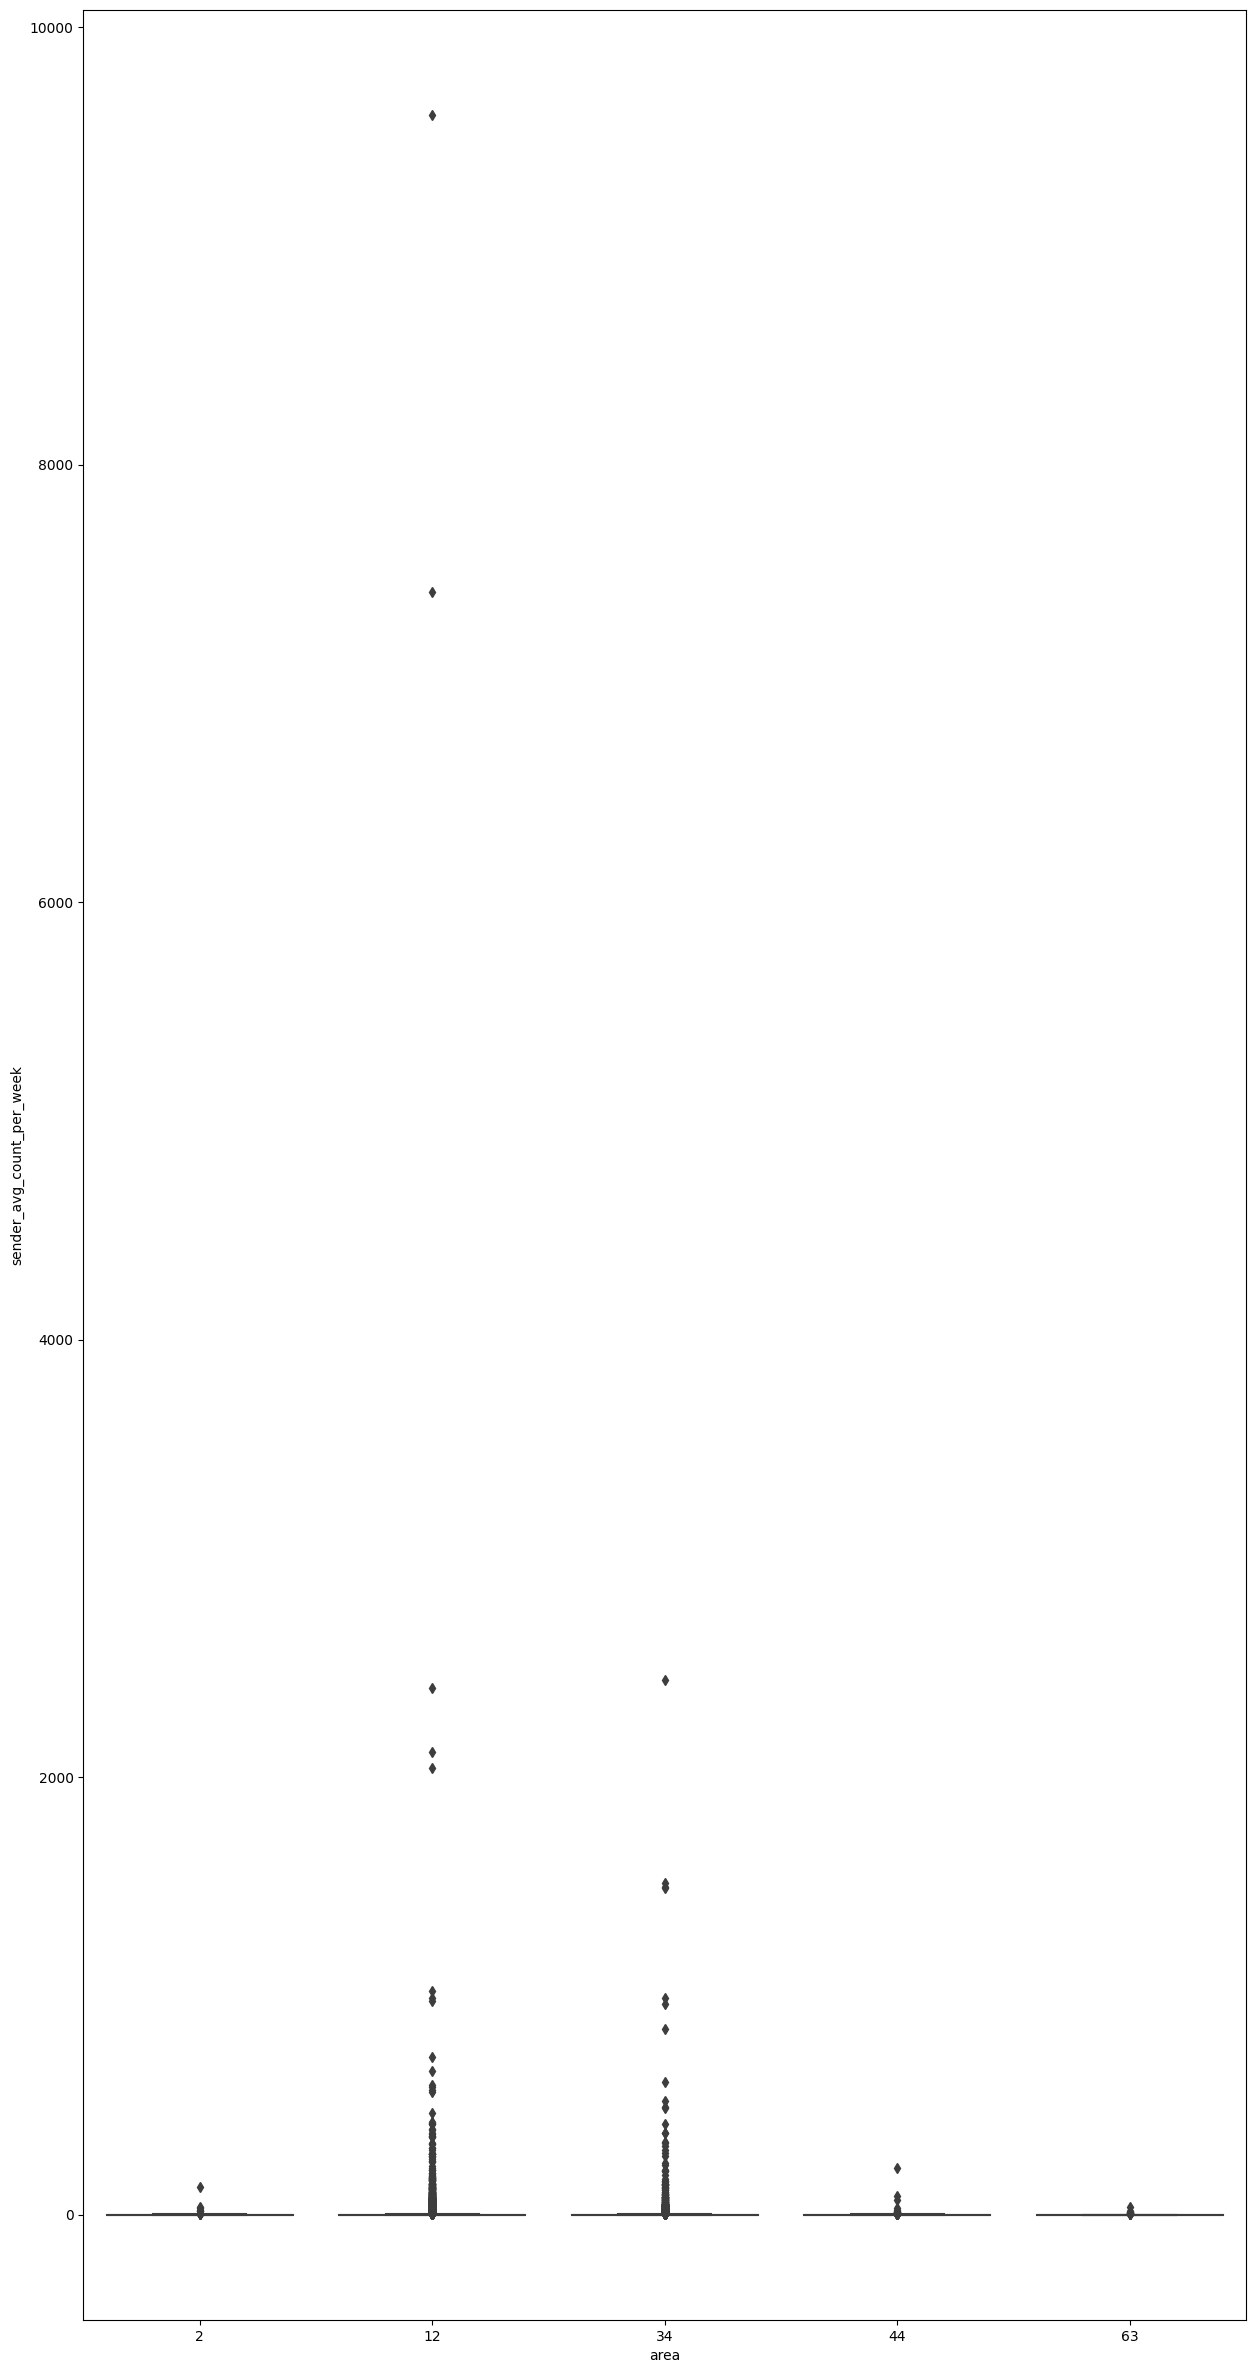

In [348]:
plt.figure(figsize=(15,30))
sns.boxplot(x='area',y='sender_avg_count_per_week', data=inns_df_copy_area)

# sns.boxplot(y='sender_mean',kind='box', data=inns_df_copy_area)

<Axes: xlabel='area', ylabel='receive_avg_count_per_week'>

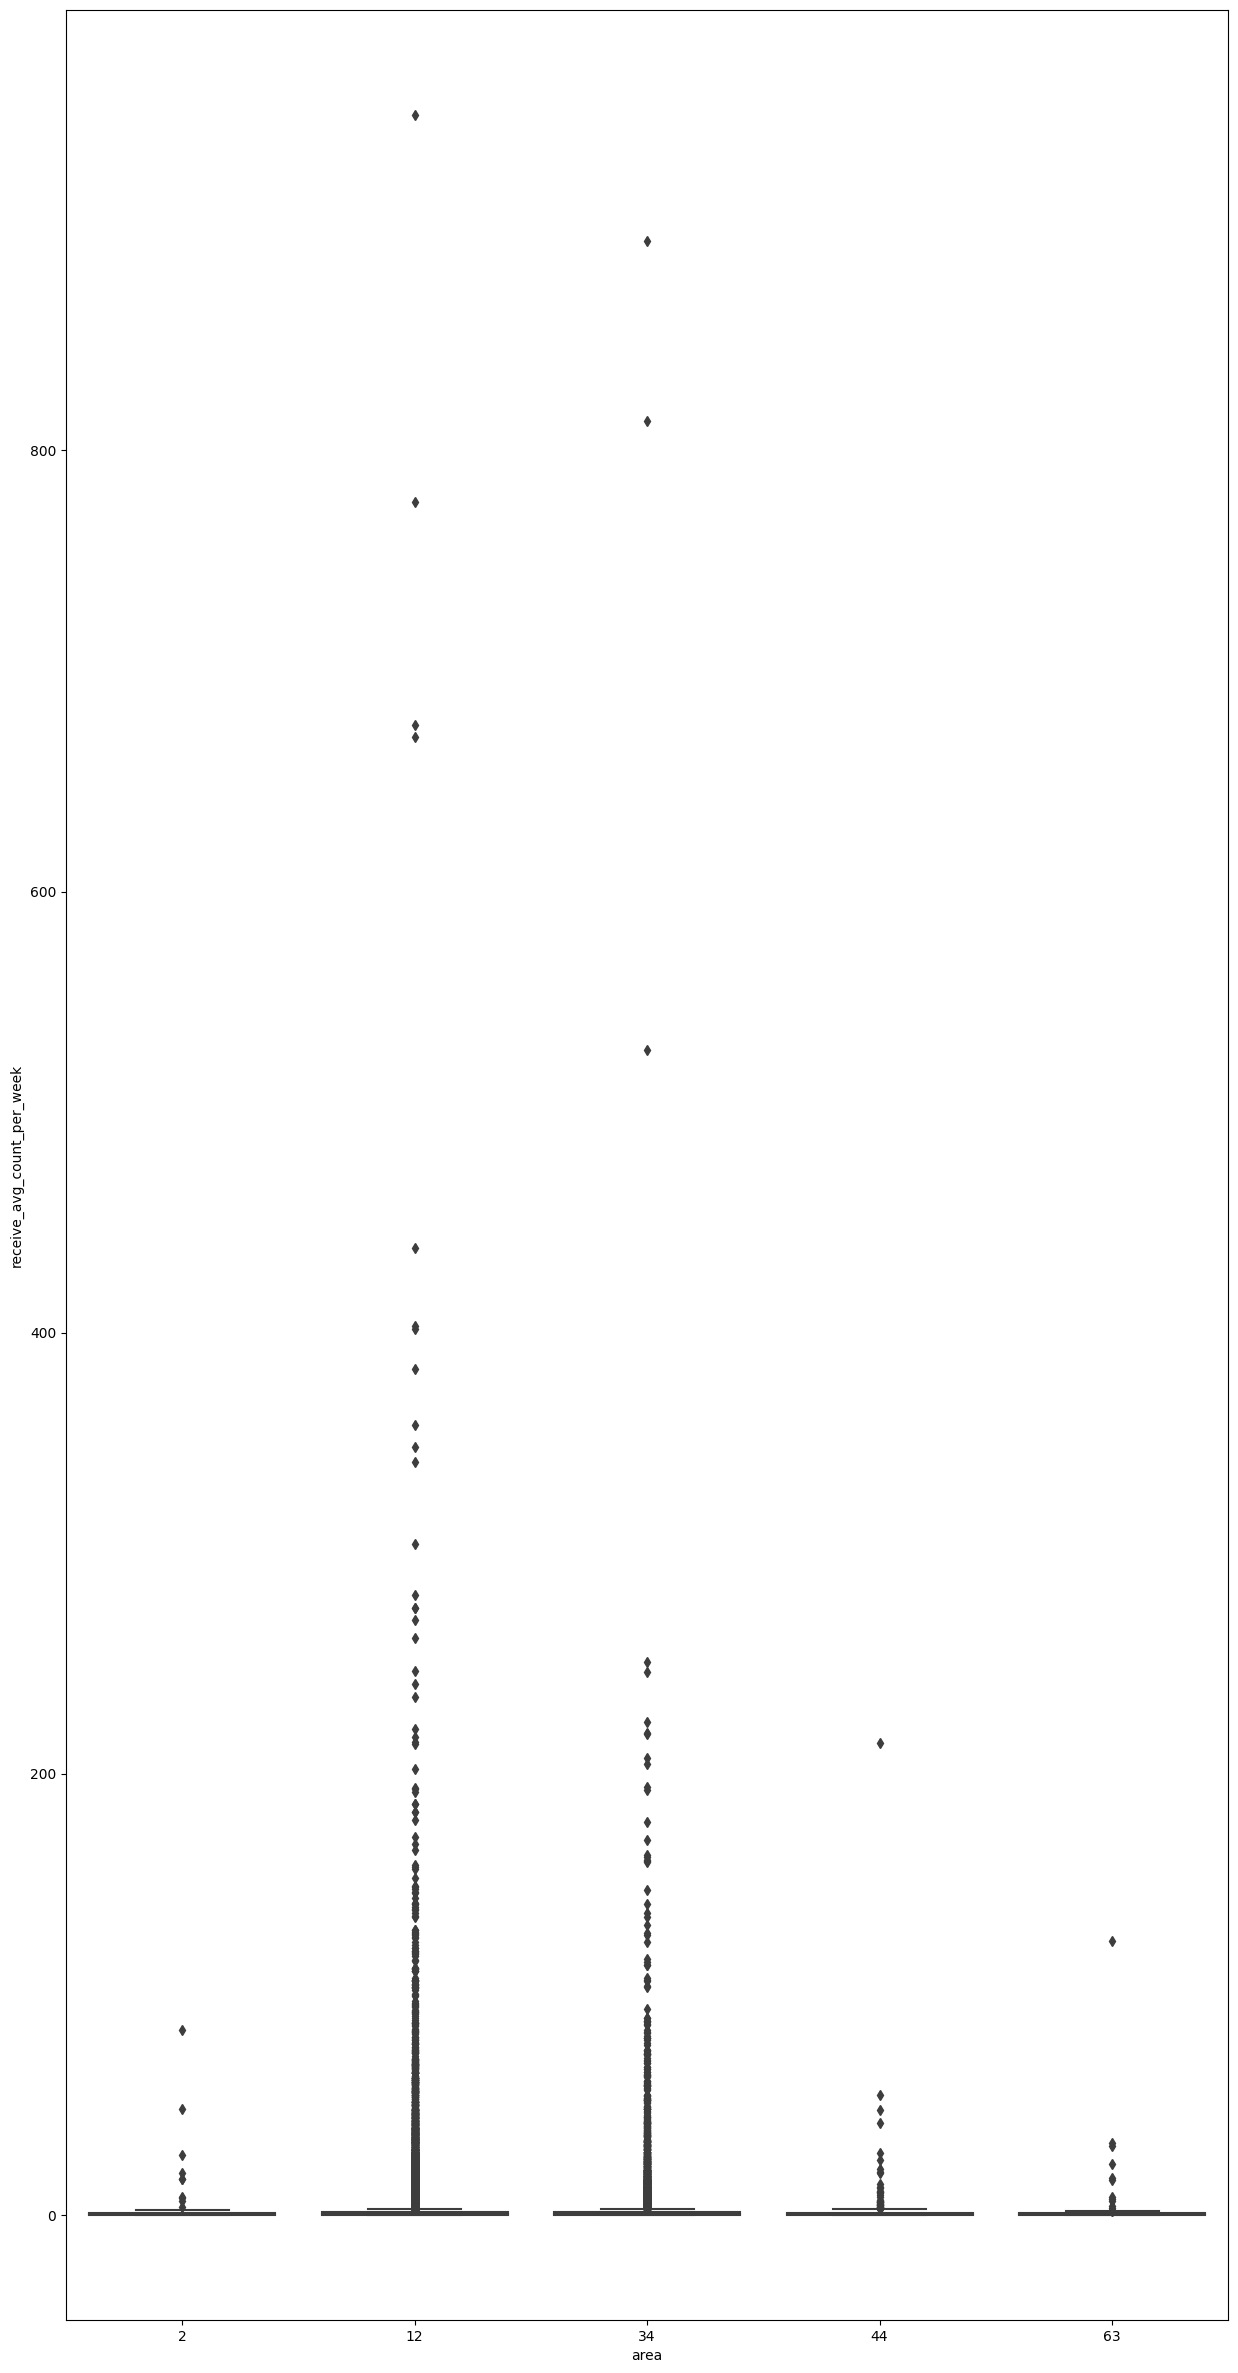

In [349]:
plt.figure(figsize=(15,30))
sns.boxplot(x='area',y='receive_avg_count_per_week', data=inns_df_copy_area)


<Axes: xlabel='area', ylabel='receive_avg_payment'>

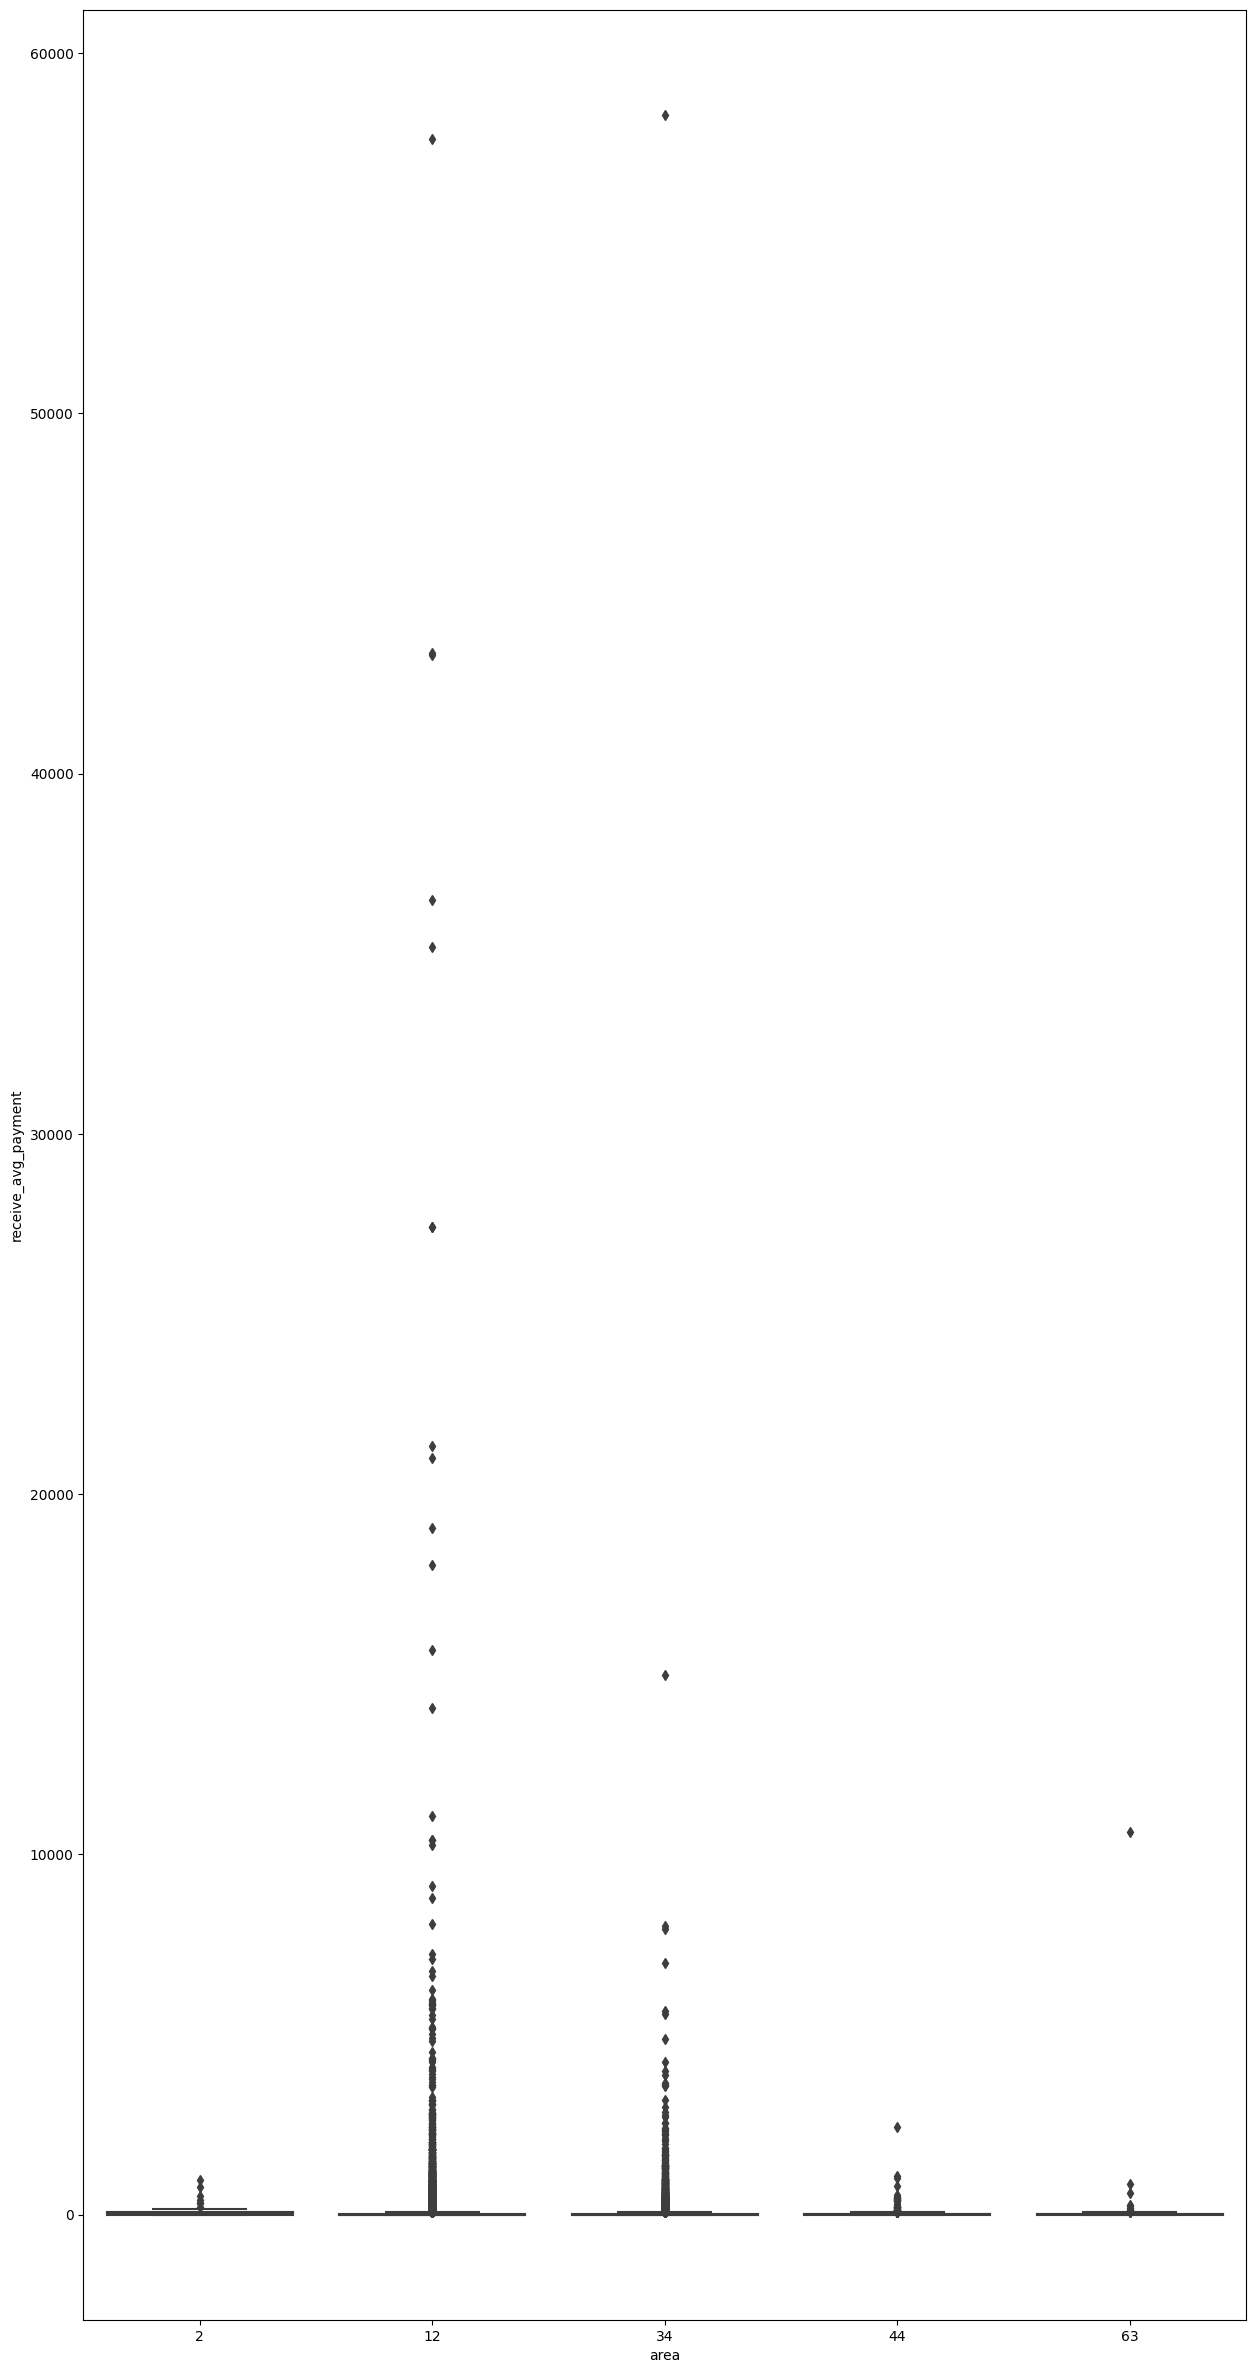

In [350]:
plt.figure(figsize=(15,30))
sns.boxplot(x='area',y='receive_avg_payment', data=inns_df_copy_area)

<Axes: xlabel='area', ylabel='sender_avg_payment'>

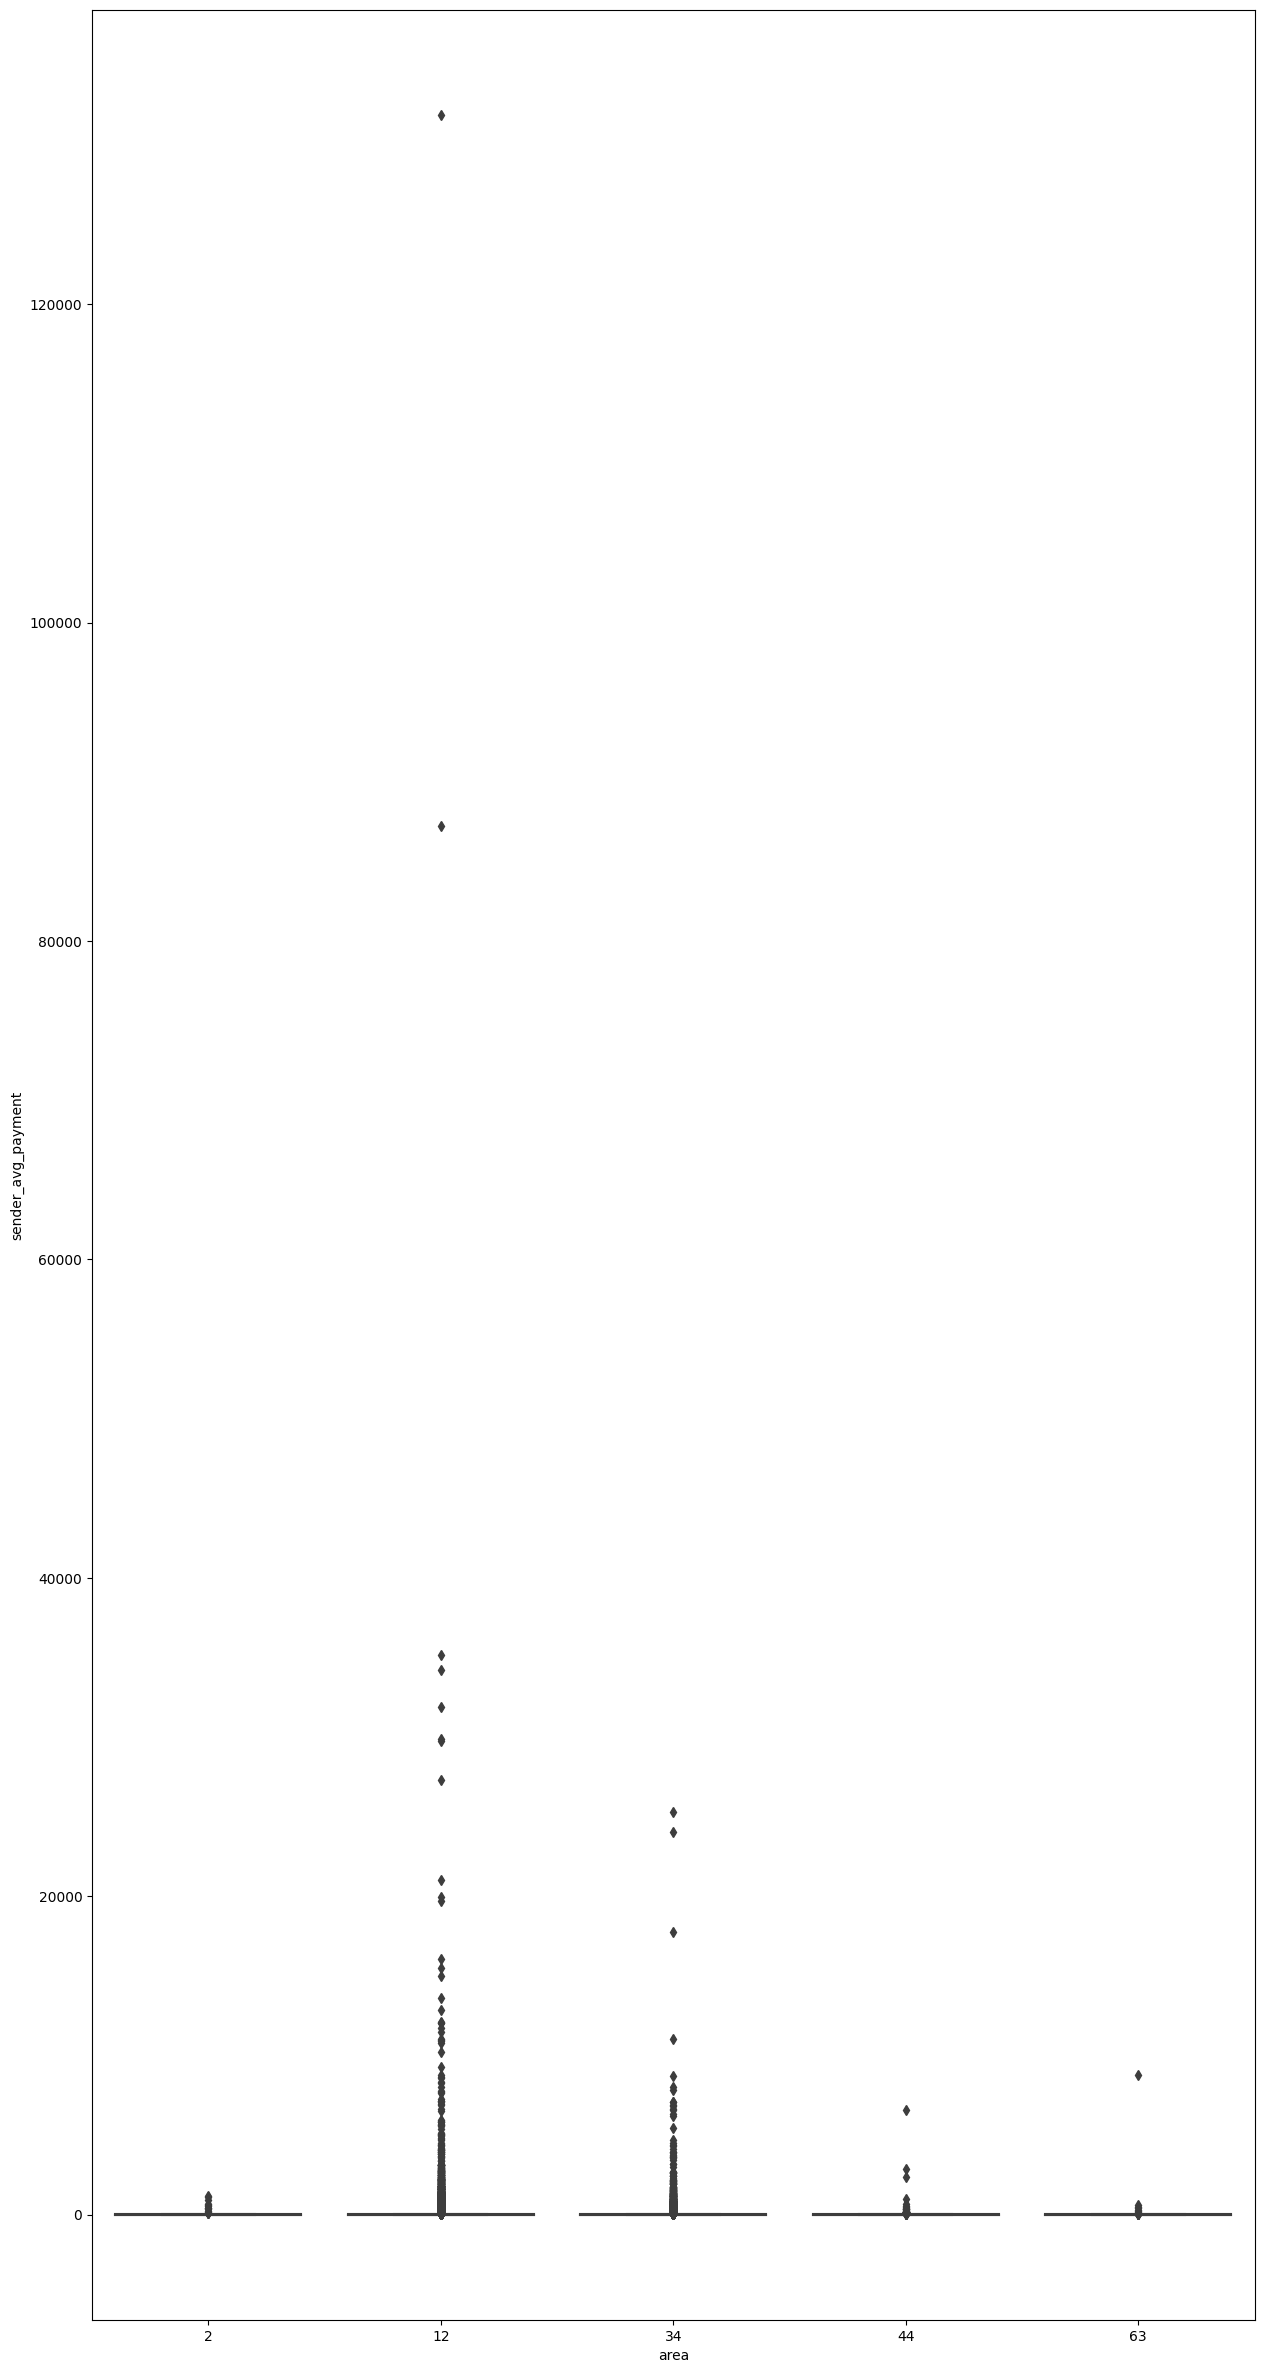

In [351]:
plt.figure(figsize=(15,30))
sns.boxplot(x='area',y='sender_avg_payment', data=inns_df_copy_area)

<Axes: xlabel='area', ylabel='receive_avg_payment'>

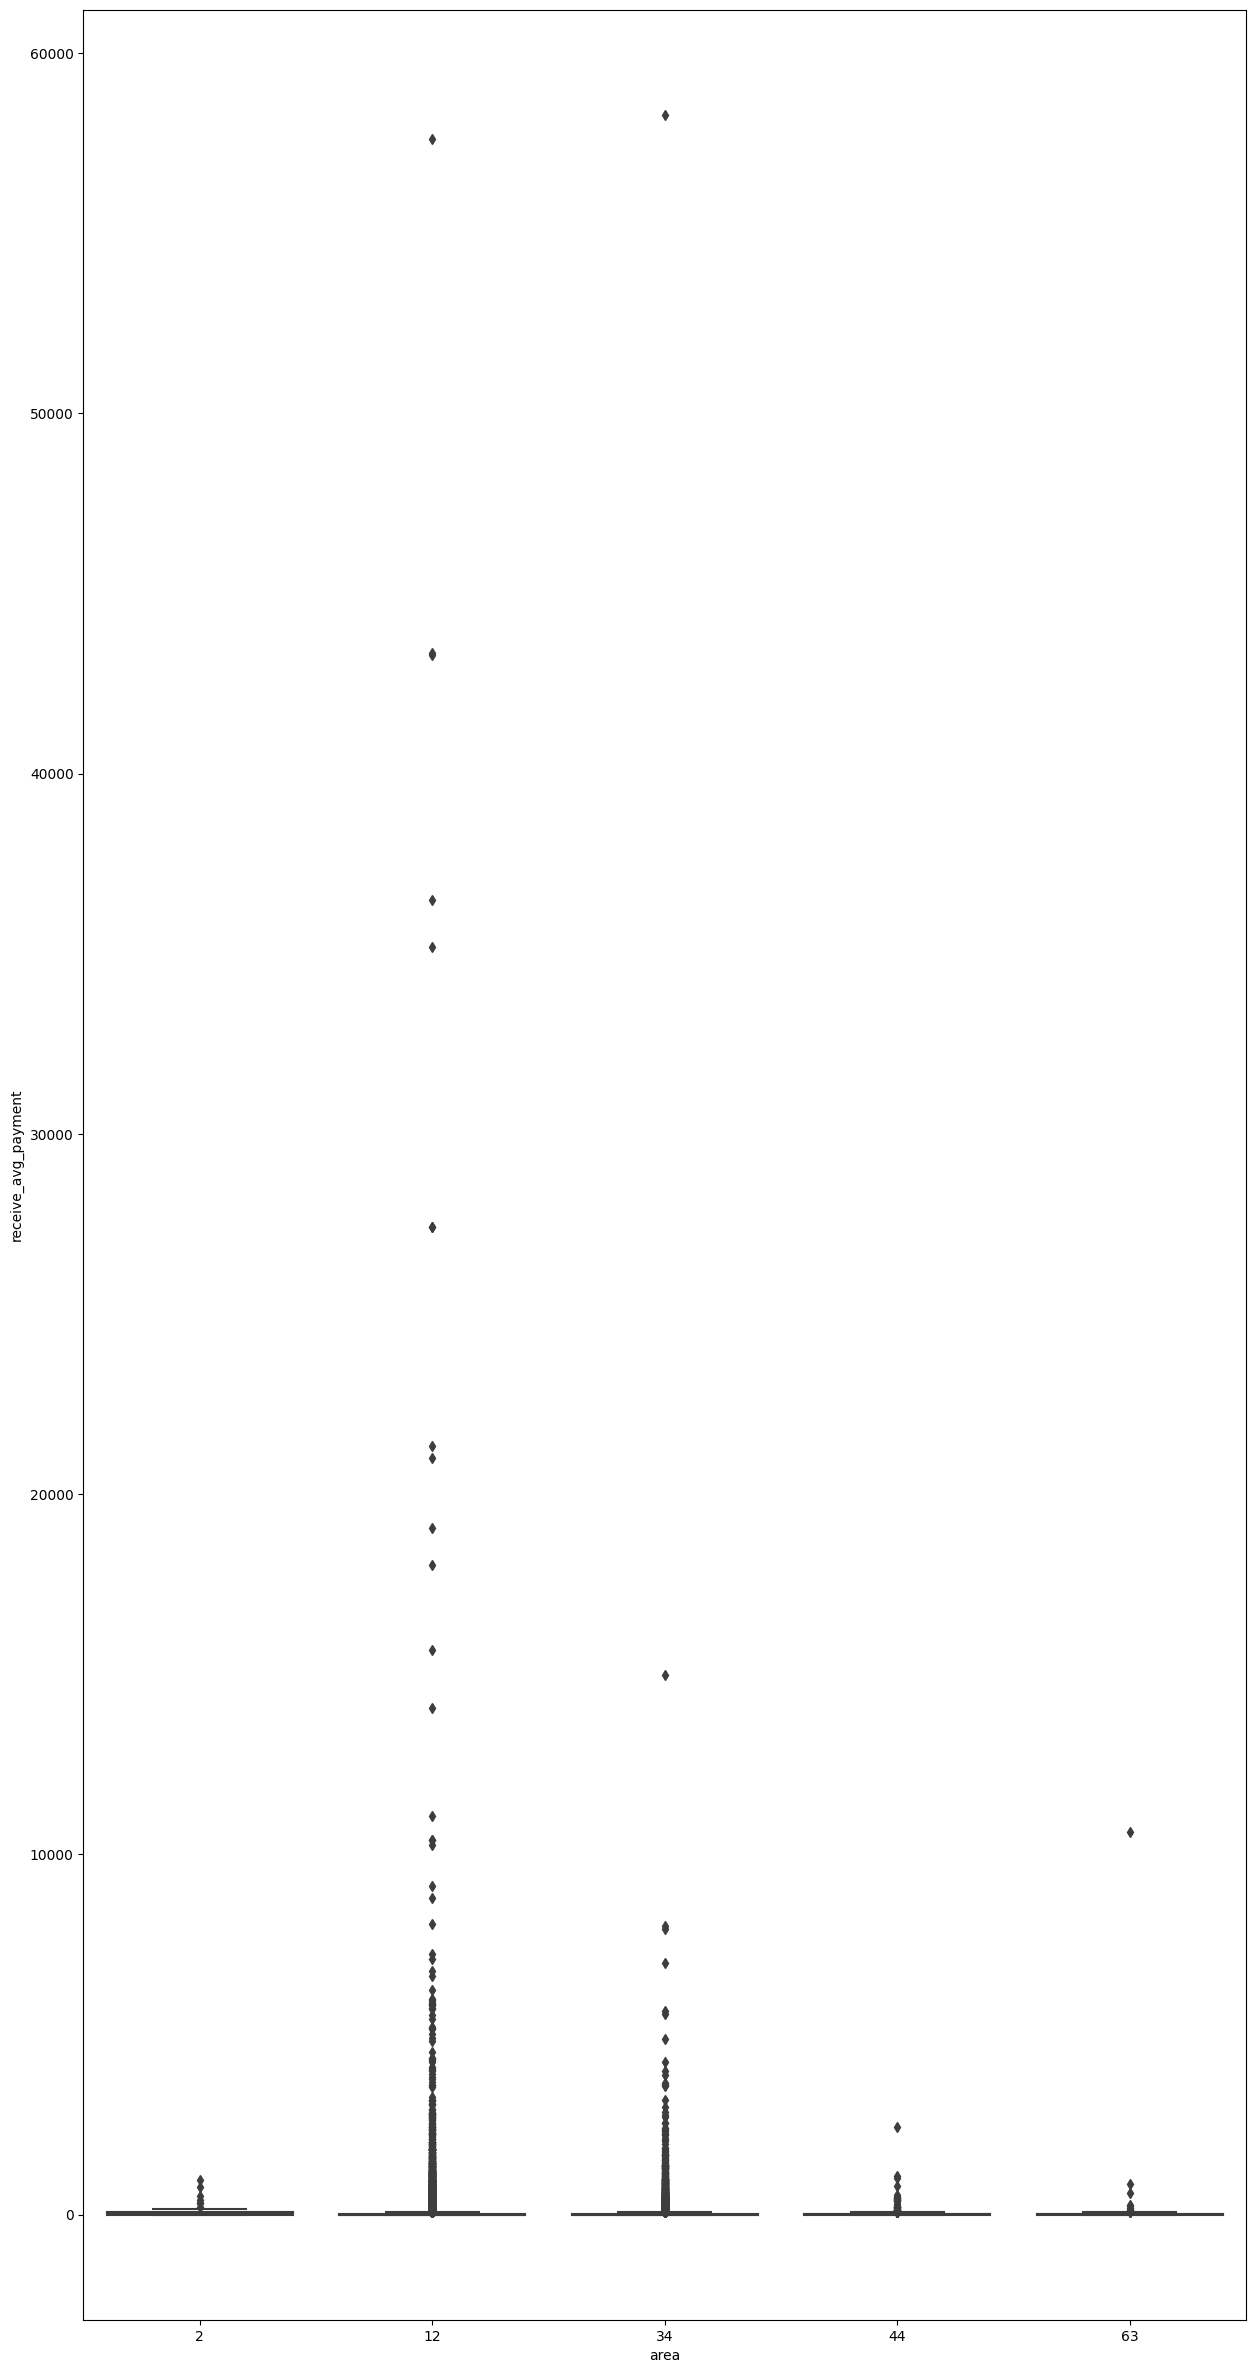

In [352]:
plt.figure(figsize=(15,30))
sns.boxplot(x='area',y='receive_avg_payment', data=inns_df_copy_area)

### Задание 7 (4 балла)

Для каждой организации в таблице pays найдите 3 отрасли с наибольшим количеством входящих платежей и исходящих платежей. Результат присоедините к таблице полученной в задании 5 по полю hash_inn. Обработайте пропуски.

In [353]:
pays_df

,hash_inn_kt,hash_inn_dt,week,count,sum,sender_count,receive_count
0,0,0,1,4,38399.6,85.0,447.0
1,0,0,5,2,399.6,7.0,NaN
2,0,0,7,2,79.6,3.0,10.0
3,0,0,9,2,239.6,1.0,NaN
4,0,0,12,2,79.6,17.0,NaN
...,...,...,...,...,...,...,...
5430145,260511,77935,5,2,399.6,NaN,NaN
5430146,260511,77935,12,2,439.6,NaN,NaN
5430147,260511,77935,14,2,7.6,NaN,NaN
5430148,260511,77935,15,2,79.6,NaN,NaN


In [354]:
inns_df

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120
1,8311,18,86,True,0.583333,9.857143,NaN,NaN
2,130273,-1,86,False,0.208333,7.248000,1.208333,14.740828
3,64081,43,86,True,0.041667,13.948000,NaN,NaN
4,218005,12,86,True,0.750000,0.564444,NaN,NaN
...,...,...,...,...,...,...,...,...
240064,139170,4,12,True,0.083333,57.800000,NaN,NaN
240065,13553,12,12,True,NaN,NaN,1.333333,2.731375
240066,230402,12,12,True,NaN,NaN,0.166667,-0.188000
240067,170104,63,12,True,NaN,NaN,0.500000,32.386000


In [355]:
inns_df_org = inns_df[inns_df['area']!=-1][['hash_inn','area']]


In [356]:
inns_df_org

,hash_inn,area
0,61058,34
1,8311,18
3,64081,43
4,218005,12
5,159729,34
...,...,...
240063,46487,52
240064,139170,4
240065,13553,12
240066,230402,12


In [357]:
pays_df_org = pays_df[['hash_inn_kt','hash_inn_dt','count']]

In [358]:
pays_df_org

,hash_inn_kt,hash_inn_dt,count
0,0,0,4
1,0,0,2
2,0,0,2
3,0,0,2
4,0,0,2
...,...,...,...
5430145,260511,77935,2
5430146,260511,77935,2
5430147,260511,77935,2
5430148,260511,77935,2


In [359]:
pays7_group = pd.merge(pays_df_org,inns_df_org,left_on='hash_inn_kt',right_on='hash_inn',how='inner')

In [360]:
pays7_group

,hash_inn_kt,hash_inn_dt,count,hash_inn,area
0,1,31310,2,1,62
1,1,31310,2,1,62
2,1,31310,2,1,62
3,1,31310,2,1,62
4,1,31310,2,1,62
...,...,...,...,...,...
3718496,260511,77935,2,260511,12
3718497,260511,77935,2,260511,12
3718498,260511,77935,2,260511,12
3718499,260511,77935,2,260511,12


In [380]:
receive_pays = pays7_group.groupby(['hash_inn_dt','area'],as_index=False)['count'].sum()
receive_pays['rank'] = receive_pays.groupby(['hash_inn_dt'])['count'].rank(method='dense',ascending=False)
receive_pays = receive_pays[receive_pays['rank']<=3]
receive_pays.pivot_table(index='hash_inn_dt',columns='rank',values='area').fillna(0)


rank,1.0,2.0,3.0
hash_inn_dt,,,
0,8.0,12.0,4.0
2,12.0,0.0,0.0
5,74.0,56.0,0.0
7,39.0,12.0,79.0
10,74.0,12.0,44.0
...,...,...,...
260510,46.0,0.0,0.0
260511,44.0,12.0,76.0
260512,12.0,0.0,0.0


In [381]:
sender_pays = pays7_group.groupby(['hash_inn_kt','area'],as_index=False)['count'].sum()
sender_pays['rank'] = sender_pays.groupby(['hash_inn_kt'])['count'].rank(method='dense',ascending=False)
sender_pays = sender_pays[sender_pays['rank']<=3]
sender_pays.pivot_table(index='hash_inn_kt',columns='rank',values='area').fillna(0)


rank,1.0
hash_inn_kt,
1,62
3,29
5,14
7,12
8,11
...,...
260504,12
260507,69
260509,12


In [384]:
inns_df_copy_area

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment,hash_inn_kt,hash_inn_dt,count_sender_area,count_receive_area,sender_mean,sender_std,receive_mean,receive_std
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,0,0,85.0,22.0,2.036325,4.516642,6.026042,15.707061
4,218005,12,86,True,0.750000,0.564444,0.000000,0.000000,0,0,17.0,0.0,0.541667,0.454911,0.000000,0.000000
5,159729,34,86,True,1.916667,6.454783,1.583333,3.228105,0,0,22.0,2.0,3.594697,7.811852,1.416667,0.000000
11,132582,12,86,True,0.000000,0.000000,0.375000,56.866667,0,7212,0.0,0.0,0.000000,0.000000,0.000000,0.000000
18,173138,12,33,True,0.291667,136.809714,0.041667,136.752000,0,25395,6.0,0.0,0.847222,1.219299,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240046,202972,12,18,True,2.458333,25.814034,0.125000,2.586667,12595,170268,0.0,0.0,0.000000,0.000000,0.000000,0.000000
240051,169816,12,69,True,0.000000,0.000000,0.208333,10.800000,12595,172739,0.0,0.0,0.000000,0.000000,0.000000,0.000000
240065,13553,12,12,True,0.000000,0.000000,1.333333,2.731375,12595,174005,0.0,0.0,0.000000,0.000000,0.000000,0.000000
240066,230402,12,12,True,0.000000,0.000000,0.166667,-0.188000,12595,174005,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [396]:
receive_pays

,hash_inn_dt,area,count,rank
1,0,4,91,3.0
3,0,8,251,1.0
6,0,12,112,2.0
33,2,12,29,1.0
34,5,56,4,2.0
...,...,...,...,...
549655,260511,44,8,1.0
549657,260511,76,2,3.0
549658,260512,12,4,1.0
549659,260514,68,2,1.0


In [476]:
inns_df_copy_area = pd.merge(inns_df_copy_area,receive_pays[['hash_inn_dt','rank']],left_on='hash_inn',right_on='hash_inn_dt',how='left')
inns_df_copy_area = pd.merge(inns_df_copy_area,sender_pays[['hash_inn_kt','rank']],left_on='hash_inn',right_on='hash_inn_kt',how='left')

/tmp/ipykernel_1044467/2046187943.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'rank_x'} in the result is deprecated and will raise a MergeError in a future version.
  inns_df_copy_area = pd.merge(inns_df_copy_area,receive_pays[['hash_inn_dt','rank']],left_on='hash_inn',right_on='hash_inn_dt',how='left')
/tmp/ipykernel_1044467/2046187943.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'hash_inn_kt_x'} in the result is deprecated and will raise a MergeError in a future version.
  inns_df_copy_area = pd.merge(inns_df_copy_area,sender_pays[['hash_inn_kt','rank']],left_on='hash_inn',right_on='hash_inn_kt',how='left')


In [477]:
inns_df_copy_area = inns_df_copy_area.fillna(0)

In [478]:
inns_df_copy_area

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment,hash_inn_kt_x,hash_inn_dt_x,...,hash_inn_dt_x,rank_y,hash_inn_kt_y,rank_x,hash_inn_kt_x,hash_inn_dt_y,hash_inn_dt,rank_y,hash_inn_kt_y,rank
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,0,0,...,0.0,0.0,0.0,0.0,61058.0,0.0,0.0,0.0,0.0,0.0
1,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,0,0,...,0.0,0.0,0.0,0.0,61058.0,0.0,0.0,0.0,0.0,0.0
2,218005,12,86,True,0.750000,0.564444,0.000000,0.000000,0,0,...,0.0,0.0,218005.0,1.0,0.0,0.0,0.0,0.0,218005.0,1.0
3,159729,34,86,True,1.916667,6.454783,1.583333,3.228105,0,0,...,159729.0,1.0,159729.0,1.0,0.0,0.0,159729.0,1.0,159729.0,1.0
4,132582,12,86,True,0.000000,0.000000,0.375000,56.866667,0,7212,...,132582.0,1.0,132582.0,1.0,0.0,0.0,132582.0,1.0,132582.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667999,169816,12,69,True,0.000000,0.000000,0.208333,10.800000,12595,172739,...,0.0,0.0,0.0,0.0,169816.0,0.0,0.0,0.0,0.0,0.0
668000,169816,12,69,True,0.000000,0.000000,0.208333,10.800000,12595,172739,...,0.0,0.0,0.0,0.0,169816.0,0.0,0.0,0.0,0.0,0.0
668001,13553,12,12,True,0.000000,0.000000,1.333333,2.731375,12595,174005,...,0.0,0.0,13553.0,1.0,0.0,0.0,0.0,0.0,13553.0,1.0
668002,230402,12,12,True,0.000000,0.000000,0.166667,-0.188000,12595,174005,...,230402.0,1.0,230402.0,1.0,0.0,0.0,230402.0,1.0,230402.0,1.0


### Задание 8 (3 балла)

Таким образом, в таблице, полученной в задании 7 Вы получили новые признаки для решения задачи классификации отраслей. Предложите 2 своих признака, которые как Вам кажется были бы полезны для решения данной задачи. Вычислите значения этих признаков для каждой организации в таблице inn_info_public и присоедениете результат к таблице, полученной в задании 7 по полю hash_inn. 

In [420]:
pays_df_new_features =  pays_df[['hash_inn_kt','hash_inn_dt','week','count']]

In [421]:
pays_df_new_features

,hash_inn_kt,hash_inn_dt,week,count
0,0,0,1,4
1,0,0,5,2
2,0,0,7,2
3,0,0,9,2
4,0,0,12,2
...,...,...,...,...
5430145,260511,77935,5,2
5430146,260511,77935,12,2
5430147,260511,77935,14,2
5430148,260511,77935,15,2


Добавление инн у которого нет исходящего платежа

In [479]:
sets_receive = set(pays_df_new_features['hash_inn_kt'].values)
sets_sender = set(pays_df_new_features['hash_inn_dt'].values)
df_new_features = pd.DataFrame()
df_new_features['hash_inn_kt'] = list(sets_sender-sets_receive)
df_new_features['hash_inn_dt'] = np.NaN
df_new_features['week'] = np.NaN
df_new_features['count'] = np.NaN
df_new_features['sum'] = np.NaN
paid = df_new_features.append(df_new_features,ignore_index=True)
paid = paid.merge(inns_df[['hash_inn','region']],left_on='hash_inn_kt',right_on = 'hash_inn',how='left')
paid = paid.merge(inns_df[['hash_inn','region']],left_on='hash_inn_dt',right_on = 'hash_inn',how='left')
paid.rename(columns={'region_x':'region_kt','region_y':'region_dt','hash_inn_kt':'hash_inn_kt_new','hash_inn_dt':'hash_inn_dt_new'},inplace=True)
paid.drop(['hash_inn_x','hash_inn_y'],axis=1,inplace=True)
paid =paid.fillna(0)


/tmp/ipykernel_1044467/2491945579.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  paid = df_new_features.append(df_new_features,ignore_index=True)


In [480]:
paid


,hash_inn_kt_new,hash_inn_dt_new,week,count,sum,region_kt,region_dt
0,11,0.0,0.0,0.0,0.0,39.0,0.0
1,13,0.0,0.0,0.0,0.0,56.0,0.0
2,15,0.0,0.0,0.0,0.0,81.0,0.0
3,16,0.0,0.0,0.0,0.0,77.0,0.0
4,22,0.0,0.0,0.0,0.0,60.0,0.0
...,...,...,...,...,...,...,...
175817,260508,0.0,0.0,0.0,0.0,26.0,0.0
175818,260512,0.0,0.0,0.0,0.0,26.0,0.0
175819,260513,0.0,0.0,0.0,0.0,36.0,0.0
175820,260514,0.0,0.0,0.0,0.0,83.0,0.0


In [482]:
paid_receive = paid.groupby('hash_inn_kt_new',as_index=False).agg(
                                                      { 'region_kt' : 'first',
                                                        'week': lambda x:list(x),
                                                        'count': lambda x:list(x),
                                                        'sum': lambda x:list(x),
                                                        'hash_inn_dt_new': lambda x:list(x),
                                                        'region_dt': lambda x:list(x),


                                                      }



                                                    )
paid_sender = paid.groupby('hash_inn_dt_new',as_index=False).agg(
                                                      {
                                                        'week': lambda x:list(x),
                                                        'count': lambda x:list(x),
                                                        'sum': lambda x:list(x),
                                                        'hash_inn_dt_new': lambda x:list(x),
                                                        'region_dt': lambda x:list(x),


                                                      }



                                                     )

In [483]:
paid_receive

,hash_inn_kt_new,region_kt,week,count,sum,hash_inn_dt_new,region_dt
0,11,39.0,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]"
1,13,56.0,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]"
2,15,81.0,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]"
3,16,77.0,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]"
4,22,60.0,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]"
...,...,...,...,...,...,...,...
87906,260508,26.0,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]"
87907,260512,26.0,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]"
87908,260513,36.0,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]"
87909,260514,83.0,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]"


In [486]:
paid_receive['hash_inn_dt_unique'] = paid_receive['hash_inn_dt_new'].apply(np.unique)
paid_sender['hash_inn_kt_unique'] = paid_receive['hash_inn_kt_new'].apply(np.unique)


In [487]:
paid


,hash_inn_kt_new,hash_inn_dt_new,week,count,sum,region_kt,region_dt
0,11,0.0,0.0,0.0,0.0,39.0,0.0
1,13,0.0,0.0,0.0,0.0,56.0,0.0
2,15,0.0,0.0,0.0,0.0,81.0,0.0
3,16,0.0,0.0,0.0,0.0,77.0,0.0
4,22,0.0,0.0,0.0,0.0,60.0,0.0
...,...,...,...,...,...,...,...
175817,260508,0.0,0.0,0.0,0.0,26.0,0.0
175818,260512,0.0,0.0,0.0,0.0,26.0,0.0
175819,260513,0.0,0.0,0.0,0.0,36.0,0.0
175820,260514,0.0,0.0,0.0,0.0,83.0,0.0


In [489]:
inns_df_copy_area = pd.merge(inns_df_copy_area,paid[['hash_inn_kt_new']],left_on='hash_inn',right_on='hash_inn_kt_new',how='left')
inns_df_copy_area = pd.merge(inns_df_copy_area,paid[['hash_inn_dt_new']],left_on='hash_inn',right_on='hash_inn_dt_new',how='left')


In [490]:
inns_df_copy_area = inns_df_copy_area.fillna(0)

In [491]:
inns_df_copy_area

,hash_inn,area,region,is_public,sender_avg_count_per_week,sender_avg_payment,receive_avg_count_per_week,receive_avg_payment,hash_inn_kt_x,hash_inn_dt_x,...,hash_inn_kt_y,rank_x,hash_inn_kt_x,hash_inn_dt_y,hash_inn_dt,rank_y,hash_inn_kt_y,rank,hash_inn_kt_new,hash_inn_dt_new
0,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,0,0,...,0.0,0.0,61058.0,0.0,0.0,0.0,0.0,0.0,61058.0,0.0
1,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,0,0,...,0.0,0.0,61058.0,0.0,0.0,0.0,0.0,0.0,61058.0,0.0
2,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,0,0,...,0.0,0.0,61058.0,0.0,0.0,0.0,0.0,0.0,61058.0,0.0
3,61058,34,86,True,8.083333,1306.807155,44.875000,159.727120,0,0,...,0.0,0.0,61058.0,0.0,0.0,0.0,0.0,0.0,61058.0,0.0
4,218005,12,86,True,0.750000,0.564444,0.000000,0.000000,0,0,...,218005.0,1.0,0.0,0.0,0.0,0.0,218005.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889947,169816,12,69,True,0.000000,0.000000,0.208333,10.800000,12595,172739,...,0.0,0.0,169816.0,0.0,0.0,0.0,0.0,0.0,169816.0,0.0
889948,169816,12,69,True,0.000000,0.000000,0.208333,10.800000,12595,172739,...,0.0,0.0,169816.0,0.0,0.0,0.0,0.0,0.0,169816.0,0.0
889949,13553,12,12,True,0.000000,0.000000,1.333333,2.731375,12595,174005,...,13553.0,1.0,0.0,0.0,0.0,0.0,13553.0,1.0,0.0,0.0
889950,230402,12,12,True,0.000000,0.000000,0.166667,-0.188000,12595,174005,...,230402.0,1.0,0.0,0.0,230402.0,1.0,230402.0,1.0,0.0,0.0


## 2 часть (бонусная) (5 баллов)

In [364]:
import numpy as np
data = np.random.rand(1000)

### Задание 1 (5 баллов)

Реализуйте функцию вычисления гистограммы по аналогии с numpy.histogram. На вход передаются два параметра: данные в формате одномерного массива, и число бинов в гистограмме. Правильность реализации будет проверяться по np.histogram(data, bins).

In [365]:
import numpy as np
data = np.random.rand(20)

In [366]:
hist,bins = np.histogram(data, bins = 20)

In [367]:
bins

array([0.02937668, 0.07631884, 0.12326101, 0.17020318, 0.21714534,
       0.26408751, 0.31102968, 0.35797184, 0.40491401, 0.45185618,
       0.49879835, 0.54574051, 0.59268268, 0.63962485, 0.68656701,
       0.73350918, 0.78045135, 0.82739351, 0.87433568, 0.92127785,
       0.96822001])

In [368]:
hist

array([2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 5, 2, 1, 2, 0, 0, 0, 1, 1, 1])

In [369]:
def my_histogramm(data,bins=10):
    n = 0
    first,last  = 0, 1
    if len(data) == 0:
        first,last = 0,1
    else:
        first,last = data.min(),data.max()
    binnew = bins if np.ndim(bins)==1 else np.linspace(first,last,bins+1,endpoint=True,dtype = np.float64)
   
    if np.ndim(bins) == 0: 
        n = np.zeros(bins,data.dtype)
        norm = bins / np.subtract(last,first)
        f_indices = np.subtract(data, first) * norm
        indices = f_indices.astype(np.intp)
        indices[indices == bins] -= 1
        n += np.bincount(indices,weights=None,minlength=bins)
    else:
        cum_n = np.zeros(bins.shape, data.dtype)
        cum_n += np.concatenate((data.searchsorted(bins[:-1], 'left'),data.searchsorted(bins[-1:], 'right')))
        n = np.diff(cum_n)
    
    return (n,binnew)

In [370]:
data

array([0.12049541, 0.65244136, 0.52460369, 0.51384323, 0.53395457,
       0.89080492, 0.56959417, 0.55487583, 0.15149979, 0.6456035 ,
       0.04593768, 0.17919076, 0.96822001, 0.52799431, 0.40904505,
       0.34387568, 0.52932453, 0.02937668, 0.84291838, 0.60408147])

In [371]:
histnew,binsnew = my_histogramm(data,bins=20)


In [372]:
histnew

array([2., 1., 1., 1., 0., 0., 1., 0., 1., 0., 5., 2., 1., 2., 0., 0., 0.,
       1., 1., 1.])

In [373]:
binsnew

array([0.02937668, 0.07631884, 0.12326101, 0.17020318, 0.21714534,
       0.26408751, 0.31102968, 0.35797184, 0.40491401, 0.45185618,
       0.49879835, 0.54574051, 0.59268268, 0.63962485, 0.68656701,
       0.73350918, 0.78045135, 0.82739351, 0.87433568, 0.92127785,
       0.96822001])

In [374]:
bins == binsnew

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [375]:
hist == histnew

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

### Задание 2 (5 баллов)

Реализуйте функцию вычисления прецентиля по аналогии с numpy.percentile. На вход передаются два параметра: данные в формате одномерного массива и процент (от 0 до 100). Правильность реализации будет проверяться по np.percentile(data, q).

In [376]:
np.percentile(data, 95)

0.8946756767470583

In [377]:
def mypercentile(arr,q):
    q = q / 100
    if not (0<=q and q<=1):
       raise(ValueError("Percentiles must be in the range [0, 100]"))   
    arr = np.array(arr).flatten()
    values_count = arr.shape[0]
    virtual_indexes = lambda values_count,q : (values_count-1)*q
    virtual_indexes = np.asanyarray(virtual_indexes(values_count,q))
    previous_indexes, next_indexes = get_index(arr,
                                                      virtual_indexes,
                                                      values_count)
 
    #sort
    arr.partition(
            np.unique(np.concatenate(([0, -1],
                                      previous_indexes.ravel(),
                                      next_indexes.ravel(),
                                      ))),
            axis=0)
 
    previous = np.take(arr,previous_indexes,axis=0)
    next = np.take(arr,next_indexes,axis=0)
    gamma = np.asanyarray(virtual_indexes - previous_indexes)
    res = lerp(previous,next, gamma, out=None)
    return res 
 
def get_index(arr, virtual_indexes, valid_values_count):
   
    previous_indexes = np.asanyarray(np.floor(virtual_indexes))
    next_indexes = np.asanyarray(previous_indexes + 1)
    indexes_above_bounds = virtual_indexes >= valid_values_count - 1
    if indexes_above_bounds.any():
        previous_indexes[indexes_above_bounds] = -1
        next_indexes[indexes_above_bounds] = -1
    indexes_below_bounds = virtual_indexes < 0
    if indexes_below_bounds.any():
        previous_indexes[indexes_below_bounds] = 0
        next_indexes[indexes_below_bounds] = 0
    if np.issubdtype(arr.dtype, np.inexact):
        virtual_indexes_nans = np.isnan(virtual_indexes)
        if virtual_indexes_nans.any():
            previous_indexes[virtual_indexes_nans] = -1
            next_indexes[virtual_indexes_nans] = -1
    previous_indexes = previous_indexes.astype(np.intp)
    next_indexes = next_indexes.astype(np.intp)
    return previous_indexes, next_indexes
 
def lerp(a, b, t, out=None):
    diff_b_a = np.subtract(b, a)
    lerp_interpolation = np.asanyarray(np.add(a, diff_b_a * t, out=out))
    np.subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)
    if lerp_interpolation.ndim == 0 and out is None:
        lerp_interpolation = lerp_interpolation[()]  
    return lerp_interpolation

In [378]:
mypercentile(data, 95)

0.8946756767470583